### Riddler Classic 

Robin of Foxley has entered the FiveThirtyEight archery tournament. Her aim is excellent (relatively speaking), as she is guaranteed to hit the circular target, which has no subdivisions — it’s just one big circle. However, her arrows are equally likely to hit each location within the target.

Her true love, Marian, has issued a challenge. Robin must fire as many arrows as she can, such that each arrow is closer to the center of the target than the previous arrow. For example, if Robin fires three arrows, each closer to the center than the previous, but the fourth arrow is farther than the third, then she is done with the challenge and her score is four.

On average, what score can Robin expect to achieve in this archery challenge?

### Assumptions:
- There is no aiming it seems -> just random shots each time given the line `However, her arrows are equally likely to hit each location within the target.`
- Assume if an arrow hits the same spot then we would end it? Should be possible though 
- Should be as simple as running simulations & ending when an arrow isn't as close. 

*note:*
- method to calculate random coordinates from circle came from stack: https://stackoverflow.com/questions/46996866/sampling-uniformly-within-the-unit-circle

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def coords():
    """Return random coordinates from a circle"""
    length = np.sqrt(np.random.uniform(0, 1))
    angle = np.pi * np.random.uniform(0, 2)

    x = length * np.cos(angle)
    y = length * np.sin(angle)
    
    return (x,y)

def distance(x,y):
    "Calculate distance of arrow shot from center, assumes center is (0,0)"
    return np.sqrt(np.sum([(x-0.00)**2, (y-0.00)**2]))

In [2]:
for _ in range(5):
    x,y = coords()
    print(f"Coords: {x,y}")
    print(f"Distance: {distance(x,y)}")

Coords: (0.6213687886059311, -0.16629916376963305)
Distance: 0.6432375792225463
Coords: (-0.28027765751690187, 0.6170729718262516)
Distance: 0.6777422945793213
Coords: (-0.5739490188021488, -0.7242404804876892)
Distance: 0.9240896870764159
Coords: (-0.22815207345104158, 0.08137811322720381)
Distance: 0.24223081127806403
Coords: (0.13475464859995456, -0.3545373414132118)
Distance: 0.3792829310365094


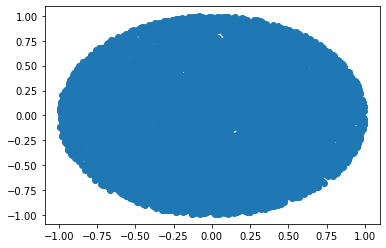

In [3]:
# ensure over a number of runs we would plot a circle when sampling
circle_list = []
for _ in range(10000):
    circle_list.append(coords())
    
# plot
plt.scatter(*zip(*circle_list))
plt.show()

### Run Simulation:

- Shoot arrows until new distance > old distance
- Keep track of arrows show

In [4]:
%%timeit

shotCount = defaultdict(lambda: 0) # all keys start at 0 -> makes it easier to update counts

for _ in range(10000):
    shots = 0
    old_distance = 9999 # start real high
    while True:
        shots += 1
        x,y = coords()
        new_distance = distance(x,y)
        if new_distance < old_distance:
            old_distance = new_distance
        else:
            shotCount[shots] += 1
            break

598 ms ± 9.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Bigger SImulation

622 ms for 10K runs. Let's bump to 1 million (should be < 100 seconds)


In [5]:
import time

for n in [10,100,1000,10000,100000,1000000,2000000, 5000000]:
    start = time.time()
    shotCount = defaultdict(lambda: 0) # all keys start at 0 -> makes it easier to update counts

    for _ in range(n):
        shots = 0
        old_distance = 9999 # start real high
        while True:
            shots += 1
            x,y = coords()
            new_distance = distance(x,y)
            if new_distance < old_distance:
                old_distance = new_distance
            else:
                shotCount[shots] += 1
                break

    end = time.time()

    total_shots = 0
    sims = 0
    for k,v in shotCount.items():
        total_shots += k*v
        sims += v

    print(f"Ran {sims} simulations in {end - start} seconds")
    print(f"Expected score: {total_shots / sims}")
    print("\n")

Ran 10 simulations in 0.0 seconds
Expected score: 2.8


Ran 100 simulations in 0.01599597930908203 seconds
Expected score: 2.72


Ran 1000 simulations in 0.0613560676574707 seconds
Expected score: 2.71


Ran 10000 simulations in 0.6547563076019287 seconds
Expected score: 2.7133


Ran 100000 simulations in 6.308211803436279 seconds
Expected score: 2.71681


Ran 1000000 simulations in 58.44832944869995 seconds
Expected score: 2.718265


Ran 2000000 simulations in 112.18716788291931 seconds
Expected score: 2.7181165


Ran 5000000 simulations in 325.42606019973755 seconds
Expected score: 2.7183372




In [7]:
np.exp(1) # looks pretty similar. 

2.718281828459045

### Solution:

Expected score is `e`, or `2.7183`